In [1]:
import yfinance as yf

In [2]:
data = yf.download('NVDA',interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


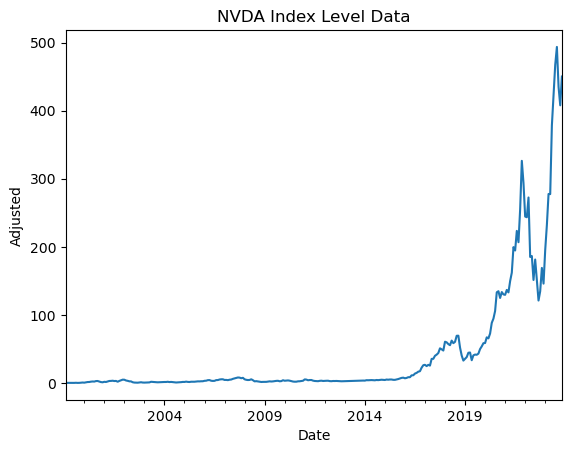

In [3]:
# a) Plot the stock price over time.

import matplotlib.pyplot as plt
data.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("NVDA Index Level Data")
plt.show()

In [4]:
data = yf.download('NVDA',interval='1mo')
data = data.loc[:, ['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [5]:
#b) Calculate the monthly returns and plot them.

returns = data['Adj Close'].pct_change()
data['returns'] = data['Adj Close'].pct_change().dropna()

In [6]:
data.describe()

,Adj Close,returns
count,298.000000,297.000000
mean,41.319043,0.038797
std,87.087532,0.178351
min,0.326116,-0.486551
25%,2.500804,-0.056095
50%,4.238801,0.030835
75%,35.695159,0.122970
max,493.509338,0.826238


In [7]:
data

,Adj Close,returns
Date,,
1999-02-01,0.419292,NaN
1999-03-01,0.403763,-0.037037
1999-04-01,0.348813,-0.136095
1999-05-01,0.326116,-0.065067
1999-06-01,0.365537,0.120880
...,...,...
2023-07-01,467.251526,0.104767
2023-08-01,493.509338,0.056196
2023-09-01,434.954163,-0.118651


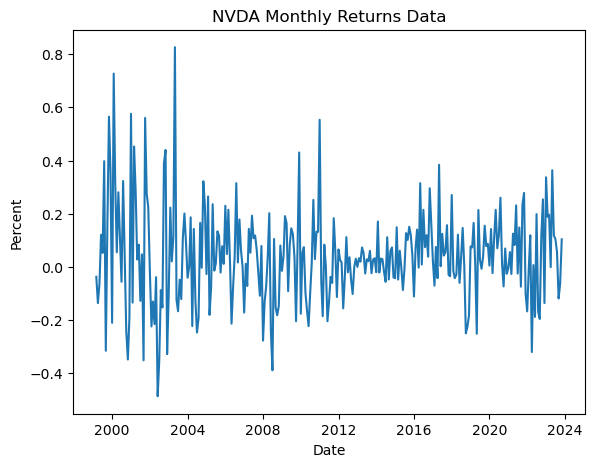

In [8]:
#b) Calculate the monthly returns and plot them.

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(data['returns'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("NVDA Monthly Returns Data")
plt.show()

In [9]:
data['Month'] = data.index.month

# c) Provide summary statistics for monthly returns.

print(data.describe())

        Adj Close     returns       Month
count  298.000000  297.000000  298.000000
mean    41.319043    0.038797    6.500000
std     87.087532    0.178351    3.439961
min      0.326116   -0.486551    1.000000
25%      2.500804   -0.056095    4.000000
50%      4.238801    0.030835    6.500000
75%     35.695159    0.122970    9.000000
max    493.509338    0.826238   12.000000


In [10]:
data

,Adj Close,returns,Month
Date,,,
1999-02-01,0.419292,NaN,2
1999-03-01,0.403763,-0.037037,3
1999-04-01,0.348813,-0.136095,4
1999-05-01,0.326116,-0.065067,5
1999-06-01,0.365537,0.120880,6
...,...,...,...
2023-07-01,467.251526,0.104767,7
2023-08-01,493.509338,0.056196,8
2023-09-01,434.954163,-0.118651,9


In [11]:
ticker_list = ['NVDA','^GSPC']
raw_data = yf.download (tickers = ticker_list, interval = "1mo")['Adj Close']
data_returns = raw_data.pct_change().dropna()
data_returns

[*********************100%%**********************]  2 of 2 completed


,NVDA,^GSPC
Date,,
1999-03-01,-0.037037,0.038794
1999-04-01,-0.136095,0.037944
1999-05-01,-0.065067,-0.024970
1999-06-01,0.120880,0.054438
1999-07-01,0.052287,-0.032046
...,...,...
2023-07-01,0.104767,0.031139
2023-08-01,0.056196,-0.017716
2023-09-01,-0.118651,-0.048719


In [12]:
data_returns.columns=['NVDAret','SP500ret']
list(data_returns.columns)

['NVDAret', 'SP500ret']

In [13]:
# d) Regress NVDA returns on S&P 500 (ticker ^GSPC) returns. Write out the fitted regression model.

import statsmodels.formula.api as smf

model = smf.ols("NVDAret ~ SP500ret", data=data_returns)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NVDAret   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           8.34e-21
Time:                        17:02:13   Log-Likelihood:                 135.23
No. Observations:                 297   AIC:                            -266.5
Df Residuals:                     295   BIC:                            -259.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0281      0.009      3.122      0.0

In [14]:
# e) Comment on the statistical significance of the estimated regression coefficients.
#P value is 0.000, les than 0.05 so there is a statistical significance.
#Let, null hypothesis is H0 ∶ β = 1, alternative hypothesis is H1 ∶ β ≠ 1
#Reject H0 since test statistic doesn't lie within non-rejection region. 
#Reject H0 since 1 doesn't lie within the confidence interval (1.647,2.444)
#R-squared (variance in the dependent variable) is 0.257. Near to 0 far from 1.
#Here, dependent variable is NVDAret and independent variable is SP500ret.
#No. Observations - Df Model - 1 = Df Residuals
#Nonrobust means there is a proper covariance.

In [15]:
# f) Build a 95% confidence interval for the coefficient of S&P 500 returns
#t value should be between -1.96 and 1.96
#The confidence interval is given by (βˆ − tcrit × SE(βˆ), βˆ + tcrit × SE(βˆ))

In [16]:
lower_CI = 2.0458-1.96*0.202
lower_CI

1.6498799999999998

In [17]:
upper_CI = 2.0458+1.96*0.202
upper_CI

2.4417199999999997

In [18]:
# 95% confidence interval for the coefficient of S&P 500 returns is (1.6499,2.4417)

In [19]:
#g) Now, let’s drop S&P 500 returns and run a simpler regression. Devise an appropriate regression and
#test if NVDA has a different average return level in January compared to other months. What do you
#conclude?
#We found data above
data_fin = data
print(data)
print(data.describe())

             Adj Close   returns  Month
Date                                   
1999-02-01    0.419292       NaN      2
1999-03-01    0.403763 -0.037037      3
1999-04-01    0.348813 -0.136095      4
1999-05-01    0.326116 -0.065067      5
1999-06-01    0.365537  0.120880      6
...                ...       ...    ...
2023-07-01  467.251526  0.104767      7
2023-08-01  493.509338  0.056196      8
2023-09-01  434.954163 -0.118651      9
2023-10-01  407.799988 -0.062430     10
2023-11-01  450.049988  0.103605     11

[298 rows x 3 columns]
        Adj Close     returns       Month
count  298.000000  297.000000  298.000000
mean    41.319043    0.038797    6.500000
std     87.087532    0.178351    3.439961
min      0.326116   -0.486551    1.000000
25%      2.500804   -0.056095    4.000000
50%      4.238801    0.030835    6.500000
75%     35.695159    0.122970    9.000000
max    493.509338    0.826238   12.000000


In [20]:
del data
data_fin['January'] = 0
data_fin

,Adj Close,returns,Month,January
Date,,,,
1999-02-01,0.419292,NaN,2,0
1999-03-01,0.403763,-0.037037,3,0
1999-04-01,0.348813,-0.136095,4,0
1999-05-01,0.326116,-0.065067,5,0
1999-06-01,0.365537,0.120880,6,0
...,...,...,...,...
2023-07-01,467.251526,0.104767,7,0
2023-08-01,493.509338,0.056196,8,0
2023-09-01,434.954163,-0.118651,9,0


In [21]:
data_fin.loc[data_fin['Month']==1, "January"] = 1

model = smf.ols("returns ~ January", data=data_fin)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.04619
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.830
Time:                        17:02:20   Log-Likelihood:                 91.127
No. Observations:                 297   AIC:                            -178.3
Df Residuals:                     295   BIC:                            -170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0395      0.011      3.650      0.0

In [22]:
#P value is higher than 0.05 significance level, t value is negative. So statistically insignificant.
#There's no relation between the overall returns of NVDA and returns on month "January".

In [23]:
data_fin

,Adj Close,returns,Month,January
Date,,,,
1999-02-01,0.419292,NaN,2,0
1999-03-01,0.403763,-0.037037,3,0
1999-04-01,0.348813,-0.136095,4,0
1999-05-01,0.326116,-0.065067,5,0
1999-06-01,0.365537,0.120880,6,0
...,...,...,...,...
2023-07-01,467.251526,0.104767,7,0
2023-08-01,493.509338,0.056196,8,0
2023-09-01,434.954163,-0.118651,9,0


In [24]:
# h) Now, let’s drop S&P 500 returns and run a simpler regression. Calculate the average return for each calendar month, i.e., average return in January, average return
# in February, etc., and report them. Do you see any pattern?
Monthly_Returns_NVDA=data_fin.groupby('Month')['returns'].mean()
Monthly_Returns_NVDA

Month
1     0.031284
2     0.068548
3     0.054034
4     0.000308
5     0.098641
6    -0.021022
7    -0.019035
8     0.082360
9    -0.022730
10    0.052676
11    0.106336
12    0.034898
Name: returns, dtype: float64

In [25]:
#As Nvidia Corporation (NVDA) is a software and fabless company, it is related to business world and its needs.
#Workers generally take their annual leave during summer. We observe that minimum returns are on summer period.
#New systems could be more applicable and workload is higher after summer period and the sector becomes dependent to NVDA.

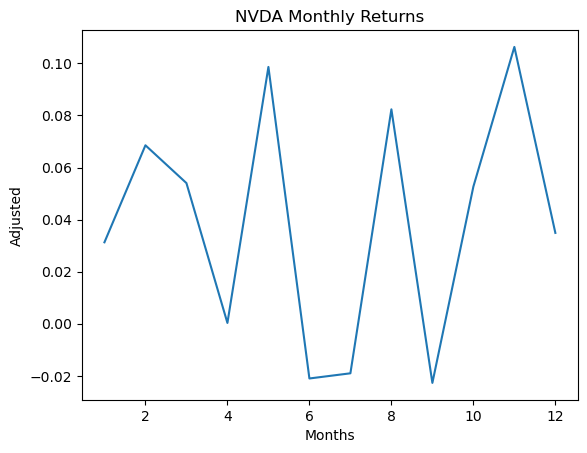

In [26]:
Monthly_Returns_NVDA.plot()
plt.xlabel("Months")
plt.ylabel("Adjusted")
plt.title("NVDA Monthly Returns")
plt.show()